We are trying to build a model which can predict the customer churn in telecom industry

In [103]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [104]:
df=pd.read_csv('customer_churn.csv')

In [105]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [106]:
df.shape

(7043, 21)

There are 7043 rows and 21 columns

In [107]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [108]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No null values present

In [109]:

df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

Target column has two unique values indicating a classification problem

In [110]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Its an imbalanced data set

<AxesSubplot:xlabel='Churn', ylabel='count'>

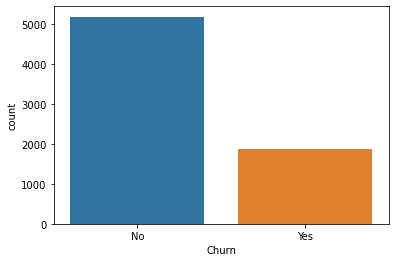

In [111]:
sb.countplot(df['Churn'])

In [112]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [113]:
df.drop(['customerID'],axis=1,inplace=True)

In [114]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [115]:
df.loc[df['TotalCharges']==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


It was found that at 11 places there were empty spaces which were considered as string values.So these values will be replaced with nan .

In [116]:
#object type was changed into float type in column 'TotalCharges'
df['TotalCharges']=df['TotalCharges'].replace(" ",np.nan).astype(float)

In [117]:
df['TotalCharges'].dtypes

dtype('float64')

In [118]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [119]:
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].mean())

The nan values were replaced with mean of that column

In [120]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [121]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Univariate analysis

categorical column Analysis

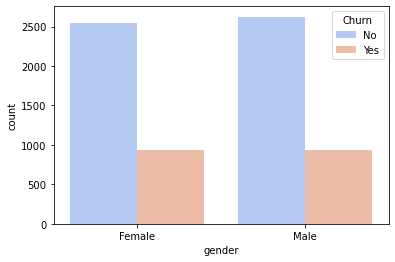

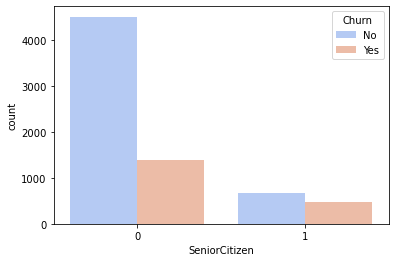

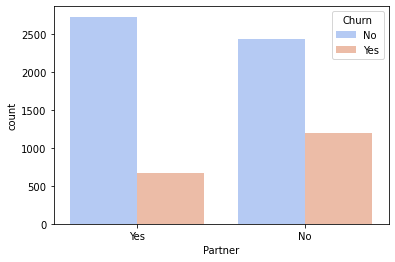

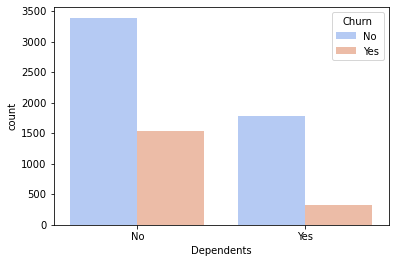

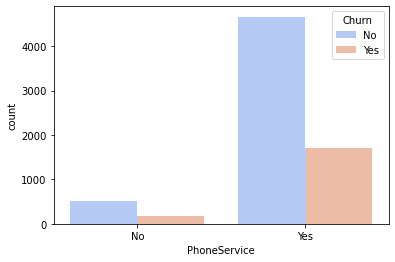

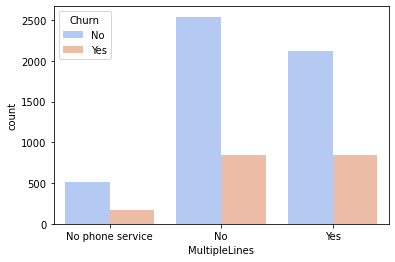

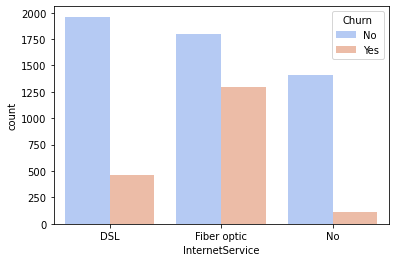

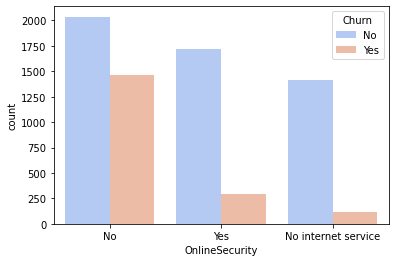

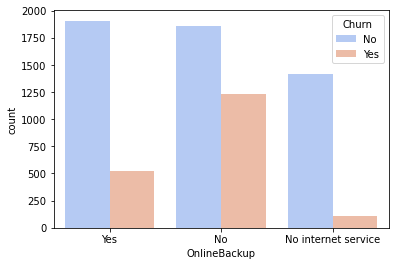

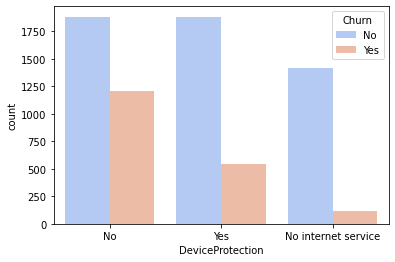

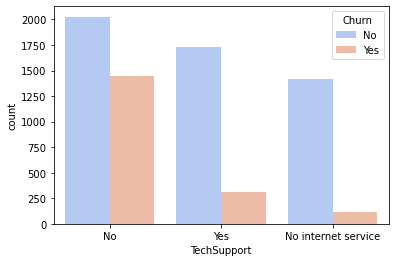

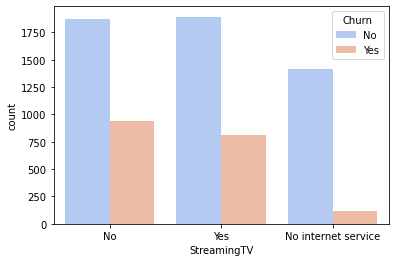

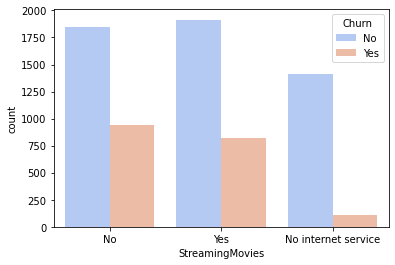

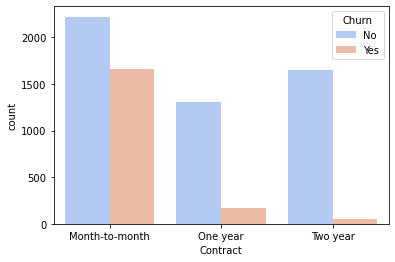

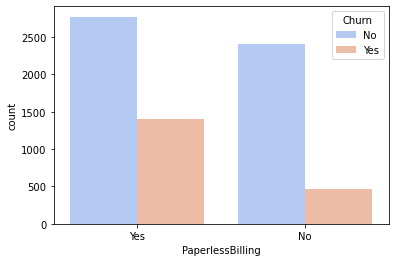

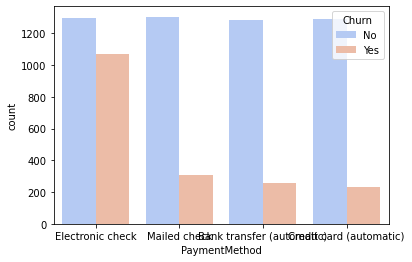

In [123]:
columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
for i in columns:
    plt.figure(i)
    sb.countplot(df[i], palette='coolwarm', hue='Churn',data=df);

The ratio of male and female with respect to churn is same.Also when it comes to senior citizens, they are both churners and non churners.ie the ratio of churner to non churner are almost same but for other age group,we have less churners.
Customers with partners are less likely to churn.Customers with dependents show less churning.People with fibre optic Internet service and no online backup show more churning.when it comes to contract customer with more than year contract have shown to be retained.while customer with monthly contract churn more.Also people using Electronic check are shown to churn more as compared to other method of payment

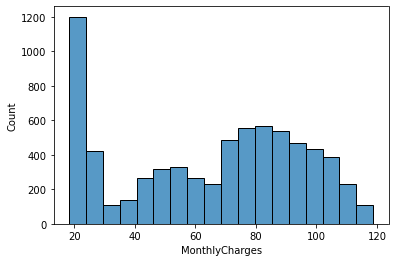

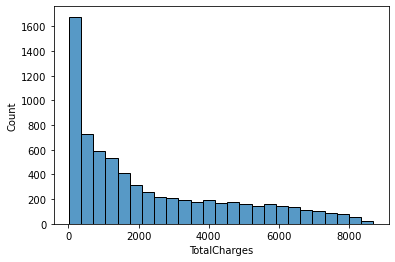

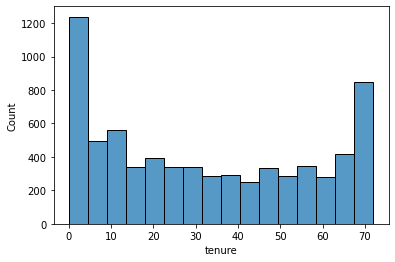

In [124]:
numerical_features=[ 'MonthlyCharges', 'TotalCharges','tenure']
for i in df[numerical_features]:
    plt.figure()
    sb.histplot(df[i])

# transform categorical feature into numerical

In [127]:
from sklearn.preprocessing import LabelEncoder

In [128]:
le=LabelEncoder()
df['Churn']=le.fit_transform(df['Churn'])

In [129]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=le.fit_transform(df[i].values.reshape(-1,1))

In [130]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


# Correlation

In [132]:
cor=df.corr()
cor

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,0.000048,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.102395,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.318812,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.064535,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.824757,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.112851,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452883,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175429,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.254308,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.375362,-0.195525


<function matplotlib.pyplot.show(close=None, block=None)>

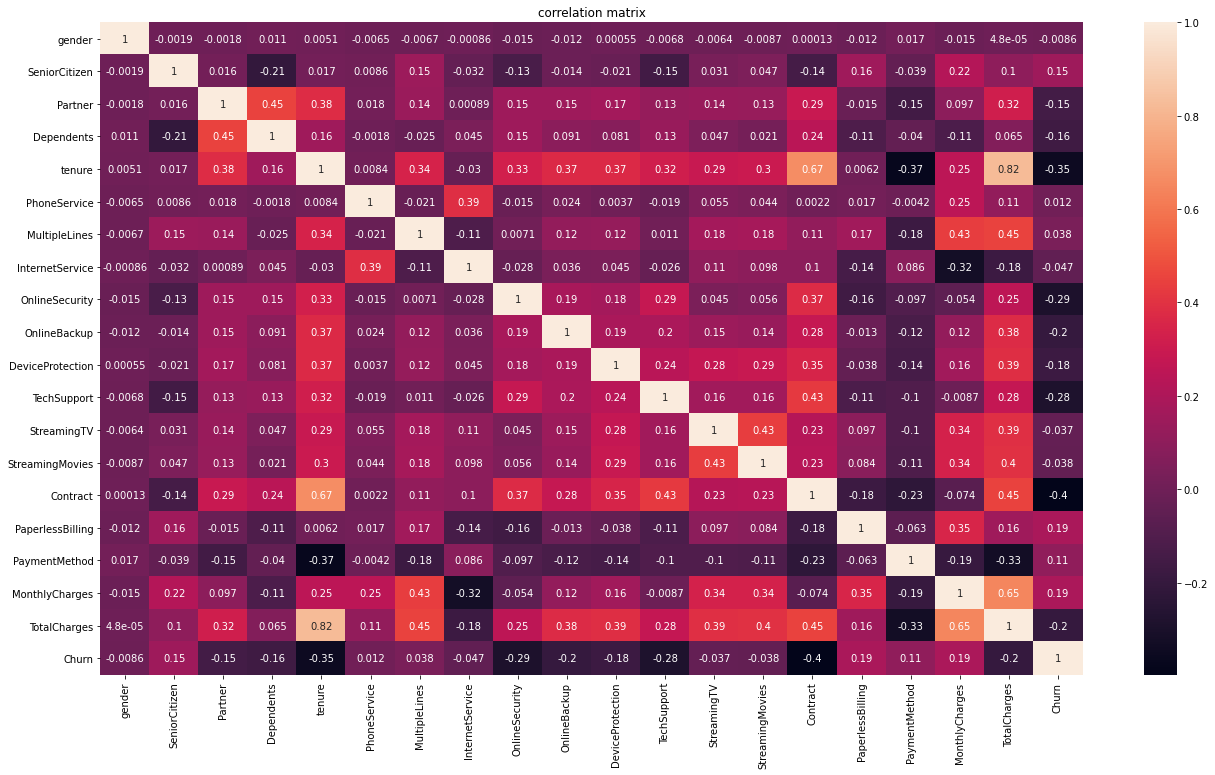

In [133]:
plt.figure(figsize=[22,12])
sb.heatmap(cor,annot=True)
plt.title('correlation matrix')
plt.show

In [134]:
cor['Churn'].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
PhoneService        0.011942
gender             -0.008612
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TotalCharges       -0.199428
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

Monthly charges,senior citizen,payment method and paperless billing was found to be positively correlated to churning.

# Boxplot

<AxesSubplot:>

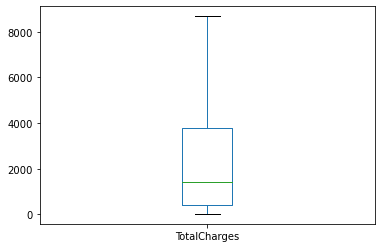

In [136]:
df["TotalCharges"].plot.box()

<AxesSubplot:>

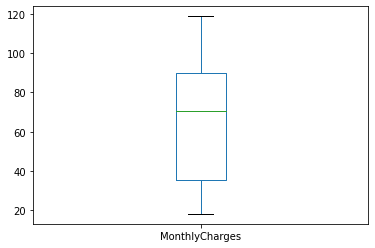

In [137]:
df["MonthlyCharges"].plot.box()

<AxesSubplot:>

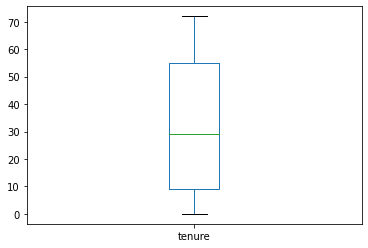

In [138]:
df["tenure"].plot.box()

No outlier present

In [139]:
y=df["Churn"]
x=df.drop("Churn",axis=1)

In [140]:
x.shape

(7043, 19)

In [141]:
x.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50


In [142]:
y.shape

(7043,)

In [143]:
y.head(2)

0    0
1    0
Name: Churn, dtype: int32

# standardisation

In [145]:
from sklearn.preprocessing import MinMaxScaler

In [146]:
scale=MinMaxScaler()
df_new=scale.fit_transform(x)

In [147]:
df_new=pd.DataFrame(df_new,columns=x.columns)

In [148]:
x=df_new

In [149]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Upsampling

In [152]:
from imblearn.over_sampling import RandomOverSampler

In [153]:
ros=RandomOverSampler(1)

In [154]:
x_res,y_res=ros.fit_resample(x,y)

In [155]:
from collections import Counter

In [156]:
print(sorted(Counter(y).items()))

[(0, 5174), (1, 1869)]


In [157]:
print(sorted(Counter(y_res).items()))

[(0, 5174), (1, 5174)]


# choosing best random state

In [158]:
from sklearn.linear_model import LogisticRegression
maxaccu=0
maxrs=0
for i in range(1,100):
    x_train_res,x_test_res,y_train_res,y_test_res=train_test_split(x_res,y_res,test_size=0.30,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predLR=LR.predict(x_test)
    acc=accuracy_score(y_test,predLR)
    if acc>maxaccu:
        maxaccu=acc
        maxrs=i
print(maxaccu)
print(maxrs)

0.8017037387600567
1


In [159]:
x_train_res,x_test_res,y_train_res,y_test_res=train_test_split(x_res,y_res,test_size=0.30,random_state=1)

In [160]:
model=[LogisticRegression(),DecisionTreeClassifier(),SVC(),RandomForestClassifier()]
for m in model:
    m.fit(x_train_res,y_train_res)
    m.score(x_train_res,y_train_res)
    predm=m.predict(x_test_res)
    print(accuracy_score(y_test_res,predm))
    print(confusion_matrix(y_test_res,predm))
    print(classification_report(y_test_res,predm))
    print('\n')

0.7610305958132045
[[1131  451]
 [ 291 1232]]
              precision    recall  f1-score   support

           0       0.80      0.71      0.75      1582
           1       0.73      0.81      0.77      1523

    accuracy                           0.76      3105
   macro avg       0.76      0.76      0.76      3105
weighted avg       0.76      0.76      0.76      3105



0.8499194847020934
[[1244  338]
 [ 128 1395]]
              precision    recall  f1-score   support

           0       0.91      0.79      0.84      1582
           1       0.80      0.92      0.86      1523

    accuracy                           0.85      3105
   macro avg       0.86      0.85      0.85      3105
weighted avg       0.86      0.85      0.85      3105



0.7665056360708534
[[1115  467]
 [ 258 1265]]
              precision    recall  f1-score   support

           0       0.81      0.70      0.75      1582
           1       0.73      0.83      0.78      1523

    accuracy                           0

# Cross validation

In [162]:
from sklearn.model_selection import cross_val_score

In [163]:
lg=LogisticRegression()
print (cross_val_score(lg,x_res,y_res,cv=5).mean())
dtc=DecisionTreeClassifier()
print (cross_val_score(dtc,x_res,y_res,cv=5).mean())
svc=SVC()
print (cross_val_score(svc,x_res,y_res,cv=5).mean())
rfc=RandomForestClassifier()
print (cross_val_score(rfc,x_res,y_res,cv=5).mean())

0.7661390715951836
0.8821060840612398
0.7760930506230693
0.9036558537228888


# Hyperparameter tuning

In [164]:
from sklearn.model_selection import RandomizedSearchCV

In [165]:
rfc=RandomForestClassifier()

In [166]:
n_estimators= [100,200,400,500,800,1000]
max_features= ['auto','sqrt','log2']
min_samples_split= [2,4,5,7,10]
min_samples_leaf= [1,2,5,7,9]
criterion=['gini','entropy']

In [167]:
params={'n_estimators':n_estimators,
    'max_features':max_features,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf,
    'criterion':criterion}

In [168]:
params

{'n_estimators': [100, 200, 400, 500, 800, 1000],
 'max_features': ['auto', 'sqrt', 'log2'],
 'min_samples_split': [2, 4, 5, 7, 10],
 'min_samples_leaf': [1, 2, 5, 7, 9],
 'criterion': ['gini', 'entropy']}

In [171]:
rf_random = RandomizedSearchCV(estimator = rfc, param_distributions = params, n_iter = 100, cv = 3, verbose=2,scoring='accuracy', random_state=1, n_jobs = -1)

In [172]:
rf_random.fit(x_train_res,y_train_res)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 7, 9],
                                        'min_samples_split': [2, 4, 5, 7, 10],
                                        'n_estimators': [100, 200, 400, 500,
                                                         800, 1000]},
                   random_state=1, scoring='accuracy', verbose=2)

In [173]:
rf_random.best_params_

{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'criterion': 'gini'}

In [174]:
Final_model=RandomForestClassifier(n_estimators= 500, min_samples_split=2, min_samples_leaf=1, max_features='auto',criterion = 'gini')
Final_model.fit(x_train_res,y_train_res)
pred=Final_model.predict(x_test_res)
acc=accuracy_score(y_test_res,pred)
print(acc)
print(confusion_matrix(y_test_res,pred))
print(classification_report(y_test_res,pred))

0.8789049919484702
[[1294  288]
 [  88 1435]]
              precision    recall  f1-score   support

           0       0.94      0.82      0.87      1582
           1       0.83      0.94      0.88      1523

    accuracy                           0.88      3105
   macro avg       0.88      0.88      0.88      3105
weighted avg       0.89      0.88      0.88      3105



In [176]:
import joblib

In [177]:
filename='finalchurnmodel.pkl'

In [179]:
joblib.dump(Final_model,'finalchurnmodel.pkl')

['finalchurnmodel.pkl']